In [1]:
from classical_finance import *
import matplotlib.pyplot as plt

# 1 Derivatives

A definition of a derivative contract (from investopedia) is the following: 

*A derivative is a contract between two or more parties whose value is based on an agreed-upon underlying financial asset (like a security) or set of assets (like an index).*

Next we give some examples.

## 1.2 Call option

A call option pays at expiry (maturity):

$$V(T,K) = \max(S_T-K,0).\qquad (1)$$

Here $T$ is called the maturity, $K$ is the strike and $S_T$ is the price of the underlying at maturity (which is unknown).

Text(0, 0.5, 'Payoff')

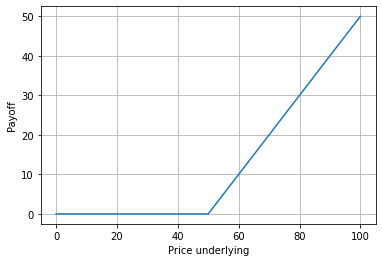

In [2]:
S = np.linspace(0,100,101)
K = 50
payoff = call_payoff(S,K)


plt.plot(S,payoff)
plt.grid()
plt.xlabel("Price underlying")
plt.ylabel("Payoff")

## 1.3 Binary call option

A binary call option pays at expiry (maturity):

$$V(T,K) = 
\begin{cases}
&1\quad \text{if}\quad S\geq K,\\
&0\quad \text{if}\quad S<K.
\end{cases}.\qquad (1)$$

Here $T$ is called the maturity, $K$ is the strike and $S_T$ is the price of the underlying at maturity (which is unknown).

Text(0, 0.5, 'Payoff')

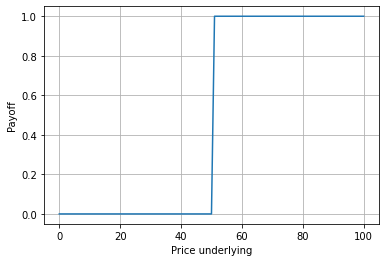

In [3]:
S = np.linspace(0,100,101)
K = 50
payoff = digital_call_payoff(S,K)


plt.plot(S,payoff)
plt.grid()
plt.xlabel("Price underlying")
plt.ylabel("Payoff")

# 2. Pricing under the Black-Scholes model

## 2.1 The pricing problem

The goal in pricing is obtaining the "fair" price of a derivatives contract $V$. In other words, how much should someone pay for buying the derivative.

## 2.2 The Black-Scholes model

When we speak about modelling in pricing we usually refer to building a Stochastic Differential Equation which is a model for the underlying. The Black-Scholes model assumes that the price of a given underlying $S_t$ is modelled through the SDE:

$$dS_t = \mu S_tdt+\sigma S_tdW_t,\qquad (2)$$

where $\mu$ is a constant called drift, $\sigma$ is another constant called volatility and $W_t$ is a Wiener process (a random variable with normal probability density function with variance $t$). 

## 2.3 The Black-Scholes PDE

Given a model for the underlying and some additional hypothesis (dynamic hedging, absence of arbitrage...), we can conclude that the "fair" price of a derivatives contract $V$ whose payoff depends on the price of the underlying $V = V(S_T)$ at some maturity $T$ has to obey the equation:

$$\dfrac{\partial V}{\partial t}+\dfrac{1}{2}\sigma^2 S^2\dfrac{\partial^2 V}{\partial S^2}+rS\dfrac{\partial V}{\partial S}-rV = 0,\qquad (3)$$

where $r$ is a constant called risk free rate (in principle is just a number that we can take from the market). This PDE is widely known as "Black-Scholes PDE". The particular conditions of each specific derivatives contract are encoded in the boundary conditions.

## 2.4 The SDE expectation

 Feymann-Kàc's theorem connects parabolic PDEs and stochastic process. Through it we can pose the solution of Black-Scholes PDE as

$$V(t,S_t) = e^{-r(T-t)}\mathbb{E}^r_t\left[V(S_T)\right],\qquad (4)$$

where $\mathbb{E}^r$ denotes the expectation under the risk neutral measure. In other words, it is like assuming a dynamic for the underlying of the form:

$$dS_t = r S_tdt+\sigma S_tdW_t.\qquad (5)$$

When we change the original drift $\mu$ to the drift $r$ we say that we have changed from the real-world measure to the risk-free measure.

## 2.5 The explicit integral



We have a thrid way of expressing the solution of this problem. In this case we explicitely write the expectation:

$$V(t,S_t) = e^{-r(T-t)}\mathbb{E}^r_t\left[S_T\right] = e^{-r(T-t)}\int_{\mathbb{R}}p(T,S)V(S).\qquad (6)$$

Where $p = p(S,t)$ is just the probability density of the random variable $S$ at time $t$. Here we see that the problem has been transformed to that of performing the previous integral. However, in order to do that we first need to know the probability density $p$. Luckily, since we know the SDE, we know that it has an associated Fokker-Planck PDE of the form:

$$\dfrac{\partial p}{\partial t} =-\dfrac{\partial}{\partial S}\left(rS\right)+\dfrac{\partial^2}{\partial S^2}\left(\dfrac{1}{2}\sigma^2S^2\right),\qquad (7)$$



We will work with some parameters:

In [4]:
r = 0.05 
volatility = 0.3
maturity = 1.
s_0 = 1.
strike = np.array([0.5, 0.75, 1., 1.25, 1.5])

# 3 Black-Scholes numerical methods

Here we give a very concise review of some numerical techniques used to price derivative contracts under the Black-Scholes model. There three ways of obtaining the prices of the derivatives contracts:
- Solving the Black-Scholes PDE.
- Solving the Black-Scholes (risk free) SDE.
- Computing explicitely the integral.

As Black-Scholes is a very simple modle, we already have analytical solutions. However, we will use it as a toy example to show the different techniques work.

## 3.1 Solving the Black-Scholes PDE

### 3.1.1 The analytical solution

The Black-Scholes PDE (3) has an analytical solution for call options of the form:

$$C(S,T) = S\Phi(d_1)-Ke^{-rT}\Phi(d_2).$$


In [5]:
call_price = bs_call_price(s_0,r,volatility,maturity,strike)

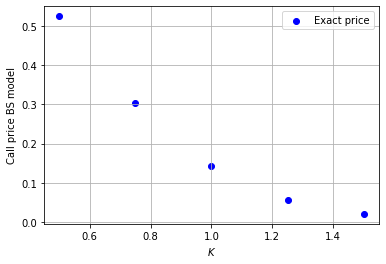

In [6]:
plt.xlabel(r"$K$")
plt.ylabel("Call price BS model")
plt.scatter(strike,call_price,label = "Exact price",color = "b")
plt.legend()
plt.grid()

### 3.1.2 When you don't have the analytical solution

When you don't have the analytical solution for the equation you have to consider any of the standard methods for solving PDEs. That includes finite differences (because the domian is usually easy to describe in the financial problems) or finite elements.

## 3.2 Solving Black-Scholes SDE

### 3.2.1 Black-Scholes exact SDE solution

The solution of Black-Scholes risk free SDE (5) is:

$$S_T = S_0e^{\sigma W_T+(r-\sigma^2/2)T},$$

where $W_T$ is a random variable with gaussian probability of mean zero and variance $T$. The strategy to obtain the price of the call given this information is:

- Generating samples of the gaussian with mean zero and variance $T$.
- Compute the associated underling price.
- Compute the associated payoff.
- Average (approximate the expectation) and apply discount.

In [7]:
number_samples = 1000

In [8]:
exact_MC_samples = bs_exact_samples(s_0,r,volatility,maturity,number_samples)
exact_MC_call_price = np.zeros(len(strike))
for i in range(len(strike)):
    exact_MC_call_price[i] = np.exp(-r*maturity)*np.sum(call_payoff(exact_MC_samples,strike[i]))/number_samples

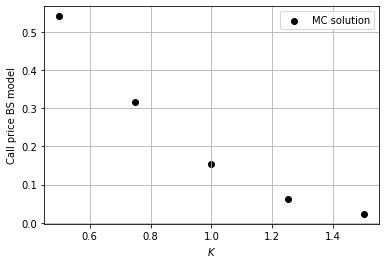

In [9]:
plt.xlabel(r"$K$")
plt.ylabel("Call price BS model")
plt.scatter(strike,exact_MC_call_price,label = "MC solution",color = "black")
plt.legend()
plt.grid()

### 3.2.2 Black-Scholes approximate SDE solution

Most of the times we don't have the solution of the SDE. In those cases we need to simulate the SDE in order to generate the samples of the underlying price. That can be easily achived doing, for example, through an Euler-Maruyama scheme:

$$S_{t+\Delta t} = S_t+rS_t\Delta t+\sigma S_t \sqrt{\Delta t}N(0,1).$$

In this case the strategy to do the pricing is:

- Generate samples of the underlying price.
    - Sample from the normal distribution of mean zero and variance one.
    - Update the state from $t$ to $t+\Delta t$.
    - Redo the previous steps until we get to maturity.
- Compute the associated payoff.
- Average (approximate the expectation) and apply discount.

In [10]:
number_samples = 1000
time_steps = 10

In [11]:
em_MC_samples = bs_em_samples(s_0,r,volatility,maturity,number_samples,time_steps)
em_MC_call_price = np.zeros(len(strike))
for i in range(len(strike)):
    em_MC_call_price[i] = np.exp(-r*maturity)*np.sum(call_payoff(em_MC_samples,strike[i]))/number_samples

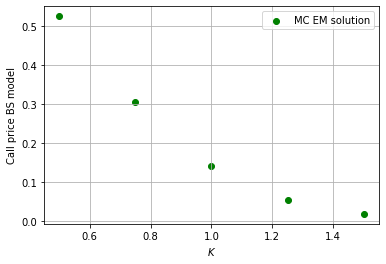

In [12]:
plt.xlabel(r"$K$")
plt.ylabel("Call price BS model")
plt.scatter(strike,em_MC_call_price,label = "MC EM solution",color = "green")
plt.legend()
plt.grid()

## 3.3 Black-Scholes explicit integral 

### 3.3.1 Exact solution of the SDE

Given the solution of the SDE we can try to solve the explicitely integral in equation (6). 

$$\int_{\mathbb{R}}p(T,S)V(S) dS= \int_{\mathbb{R}}p(x)\max\left(S_0e^{\sigma x+(r-\sigma^2/2)T},0\right)dx,$$

where $p(x)$ is a the normal density function with mean zero and variance $T$.

We approximate this integral using a cuadrature rule. In our case we will use the most simple one, Riemann cuadrature:

$$\int_{\mathbb{R}}p(x)\max\left(S_0e^{\sigma x+(r-\sigma^2/2)T},0\right)dx \approx \int^{\max}_{\min}p(x)\max\left(S_0e^{\sigma x+(r-\sigma^2/2)T},0\right)dx\approx \sum_{i=0}^{N}p(x_i)\max\left(S_0e^{\sigma x_i+(r-\sigma^2/2)T},0\right)\Delta x$$

In [13]:
x = np.linspace(-4,4,1000)

In [14]:
s_t, probability_gaussian = bs_SDE_solution(x,s_0,r,volatility,maturity)
SDE_cuadrature_call_price = np.zeros(len(strike))
for i in range(len(strike)):
    payoff_call = call_payoff(s_t,strike[i])
    SDE_cuadrature_call_price[i] = np.exp(-r*maturity)*np.dot(probability_gaussian,payoff_call)

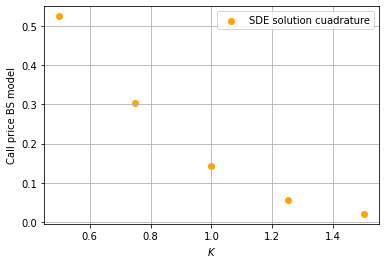

In [15]:
plt.xlabel(r"$K$")
plt.ylabel("Call price BS model")
plt.scatter(strike,SDE_cuadrature_call_price,label = "SDE solution cuadrature",color = "orange")
plt.legend()
plt.grid()

###  3.3.2 Black-Scholes explicit integral from Fokker-Planck solution

If we know the solution of the Fokker-Planck equation we can try to solve the explicitely integral in equation (6). 

$$\int_{\mathbb{R}}p(T,S)V(S) dS= \int_{\mathbb{R}}p(S,T)\max\left(S-K,0\right)dS,$$

where $p(S,T)$ is the solution of the Fokker-Planck equation at time $T$. As this is a very simmple model, we know that the solution of the Fokker-Planck equation has the form:

$$p(S,T) = \dfrac{1}{S_T\sigma\sqrt{2\pi T}}\exp\left(-\dfrac{\left(\log(S_T)-\mu\right)}{2\sigma^2T}\right)$$

We again approximate this integral using a cuadrature rule. In our case we will use the most simple one, Riemann cuadrature:

$$\int_{\mathbb{R}}p(S,T)\max\left(S-K,0\right)dS \approx \int^{\max}_{\min}p(S,T)\max\left(S-K,0\right)dS\approx \sum_{i=0}^{N}p(x_i)\max p(S_i,T)\max\left(S_i-K,0\right)\Delta S$$

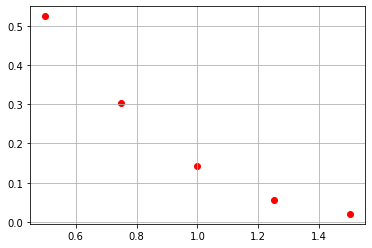

In [16]:
x = np.linspace(0.5*np.min(strike),2*np.max(strike),1000)

density_bs = bs_density(x,s_0,r,volatility,maturity)
density_bs = density_bs/np.sum(density_bs)
density_cuadrature_call_price = np.zeros(len(strike))
for i in range(len(strike)):
    payoff_call = call_payoff(x,strike[i])
    density_cuadrature_call_price[i] = np.exp(-r*maturity)*np.dot(density_bs,payoff_call)

plt.scatter(strike,density_cuadrature_call_price,label = "Density cuadrature",color = "r")
plt.grid()

### 3.3.3 Black-Scholes explicit integral from Fokker-Planck approximation

Usually we don't have the solution of the Fokker-Planck equation. In such cases we need to perform an additional step to the integration:

- Solve numerically the Fokker-Planck PDE (with finite differences for instance).
- Compute the integral.

If we have to solve a PDE, why don't we directly solve Black-Scholes PDE? The answer is that Black-Scholes PDE gives us the solution for one derivatives contract. In contrast, if we have solved the Fokker-Planck solution we can reuse this result for many different derivatives contracts (with the additional overhead of performing the integral). 

### 3.3.4 Black-Scholes all-paths approach

This last approach is not very common in finance. However, as it is the method used in the quantum Monte Carlo, we will explain how it works. When we use the Euler-Maruyama approximation of the SDE:

$$S_{t+\Delta t} = S_t+rS_t\Delta t+\sigma S_t \sqrt{\Delta t}N(0,1),$$

we usually sample from the normal distribution and build different paths. In this new approach we start by considering a discrete version of the normal distribution (similar to what we will do with the binomial model). Let's say that we have a discrete probability distribution composed of $M$ points. Then, we are going to compute the probability of all the possible paths that could produce this distribution. At the end we just have to approximate the expectation as a discrete average over all possible paths.


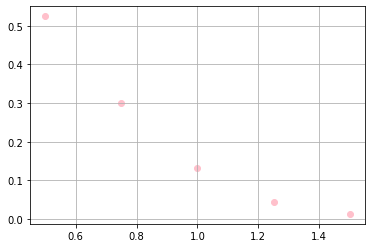

In [17]:
number_samples = 1000
time_steps = 10
discretization = 5
bounds = 4.0

s_t, p_t = bs_tree(s_0,r,volatility,maturity,number_samples,time_steps,discretization,bounds)
tree_call_price = np.zeros(len(strike))
for i in range(len(strike)):
    tree_call_price[i] = np.exp(-r*maturity)*np.dot(p_t[-1],call_payoff(s_t[-1],strike[i]))


plt.scatter(strike,tree_call_price,label = "Tree solution",color = "pink")
plt.grid()